In [1]:
import requests
import json
import html
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
import unicodedata

C:\Users\Karina\miniconda3\lib\site-packages\requests\__init__.py:109: RequestsDependencyWarning: urllib3 (2.2.2) or chardet (3.0.4)/charset_normalizer (2.0.4) doesn't match a supported version!
  warnings.warn(


In [2]:
# Function to remove special characters
def normalize_name(name):
    # Normalize to remove accents and special characters
    name = unicodedata.normalize('NFD', name)
    # Encode to ASCII and ignore errors, then decode back to string
    name = name.encode('ascii', 'ignore').decode('utf-8')
    return name

In [3]:

# # URL of the JSON file
# url = "https://itra.run/Races/RaceResults/TOR330.Tor.des.G%C3%A9ants%C2%AE/2023/80226"

# # Send a GET request to fetch the JSON data
# response = requests.get(url)
# response

In [4]:
years = [ '2024', '2023', 
         '2022', '2022_HOTEL_ITALIA',  # bad weather at the end 
         '2021', 
         '2019',
#          '2020', # cancelled due to covid
         '2018', '2017', '2016', 
         #'2015', # having issues with 2015
         '2014', '2013', '2012', '2011', '2010']

races = ['TOR330', 'TOR450']

#### Loading ITRA 

In [5]:

TORX_itra_df = {}
# races = ['TOR450']

for race in races:
    for year in years:
        try:
            
            file = f'{race} Data/ITRA/TXT/{race}_{year}.txt'
            df = pd.read_csv(file, delimiter='\t', 
                         dtype={'Time': 'string'})    

            # renaming columns so it is easier later to compare
            df = df.rename(columns={"Runner": "Name",
                                    "Gender": "Sex",
                                    "Nationality": "ITRA_Nationality",
                                   })

            # change the name to a title case
            df['Name'] = df['Name'].str.title()
            df['Name'] = df['Name'].apply(normalize_name)

            # Convert 'Time' to timedelta format
            df['Performance'] = pd.to_timedelta(df['Time'], errors='coerce')

            if year == '2022_HOTEL_ITALIA':
            # Create the 'Status' column
                df['Status'] = np.where(df['Performance'].isna(), 'DNF', 'Finished at Hotel Italia')
                df['Race'] = f'{race}'
                df['Year'] = f'2022'
            else:
                df['Status'] = np.where(df['Performance'].isna(), 'DNF', 'Finished')
                df['Race'] = f'{race}'
                df['Year'] = f'{year}'
                
#             # Drop the intermediate columns if they're no longer needed
            df = df.drop(columns=['Time', '#'])

            df['Name'] = df['Name'].str.strip()
            
#             print(race, year, '\n', df.head())
            
            # Store the DataFrame in the dictionary with a key like 'TOR330_2021'
            TORX_itra_df[f'{race}_{year}'] = df
            print('* ',f'{race}_{year} {df.shape}', '\n')
        except:
            
            if file == 'TOR330 Data/ITRA/TXT/TOR330_2022_HOTEL_ITALIA.txt':
                pass
            
            else:
                print(f'issues with {race}_{year}')
                print(f'{file}')
                print('\n')
            


*  TOR330_2024 (1085, 8) 

*  TOR330_2023 (1093, 8) 

*  TOR330_2022 (408, 8) 

*  TOR330_2021 (712, 8) 

*  TOR330_2019 (941, 8) 

*  TOR330_2018 (879, 8) 

*  TOR330_2017 (461, 8) 

*  TOR330_2016 (445, 8) 

*  TOR330_2014 (443, 8) 

*  TOR330_2013 (383, 8) 

*  TOR330_2012 (391, 8) 

*  TOR330_2011 (300, 8) 

*  TOR330_2010 (179, 8) 

*  TOR450_2024 (168, 8) 

*  TOR450_2023 (173, 8) 

*  TOR450_2022 (46, 8) 

*  TOR450_2022_HOTEL_ITALIA (11, 8) 

*  TOR450_2021 (56, 8) 

*  TOR450_2019 (100, 8) 

issues with TOR450_2018
TOR450 Data/ITRA/TXT/TOR450_2018.txt


issues with TOR450_2017
TOR450 Data/ITRA/TXT/TOR450_2017.txt


issues with TOR450_2016
TOR450 Data/ITRA/TXT/TOR450_2016.txt


issues with TOR450_2014
TOR450 Data/ITRA/TXT/TOR450_2014.txt


issues with TOR450_2013
TOR450 Data/ITRA/TXT/TOR450_2013.txt


issues with TOR450_2012
TOR450 Data/ITRA/TXT/TOR450_2012.txt


issues with TOR450_2011
TOR450 Data/ITRA/TXT/TOR450_2011.txt


issues with TOR450_2010
TOR450 Data/ITRA/TXT/TOR450_2

In [6]:
for race in races:
    for year in years:
        try:
            tor_year = TORX_itra_df[f'{race}_{year}']

            # Count the occurrences of each status
            status_counts = tor_year['Status'].value_counts()

            print(race, year, '\n', status_counts, '\n', '*'*40)
        except:
            pass

TOR330 2024 
 DNF         552
Finished    533
Name: Status, dtype: int64 
 ****************************************
TOR330 2023 
 Finished    621
DNF         472
Name: Status, dtype: int64 
 ****************************************
TOR330 2022 
 Finished    408
Name: Status, dtype: int64 
 ****************************************
TOR330 2021 
 Finished    431
DNF         281
Name: Status, dtype: int64 
 ****************************************
TOR330 2019 
 Finished    563
DNF         378
Name: Status, dtype: int64 
 ****************************************
TOR330 2018 
 Finished    534
DNF         345
Name: Status, dtype: int64 
 ****************************************
TOR330 2017 
 Finished    461
Name: Status, dtype: int64 
 ****************************************
TOR330 2016 
 Finished    445
Name: Status, dtype: int64 
 ****************************************
TOR330 2014 
 Finished    443
Name: Status, dtype: int64 
 ****************************************
TOR330 2013 
 Finish

In [7]:
# Append using pd.concat
TORX_itra_df = pd.concat(TORX_itra_df)
TORX_itra_df = TORX_itra_df.reset_index(drop = True)
TORX_itra_df.isna().sum()

Name                   0
Age                    0
Sex                   12
ITRA_Nationality       0
Performance         2301
Status                 0
Race                   0
Year                   0
dtype: int64

In [8]:
TORX_itra_df[TORX_itra_df['Sex'].isna()]

,Name,Age,Sex,ITRA_Nationality,Performance,Status,Race,Year
643,Coluccio Pasquale,60,NaN,ITA,NaT,DNF,TOR330,2024
1223,Bryant Shane,45,NaN,USA,4 days 23:30:03,Finished,TOR330,2023
1608,D'Angelo Deva,33,NaN,ITA,6 days 01:56:32,Finished,TOR330,2023
1760,Cailleau Marie Aline,56,NaN,FRA,NaT,DNF,TOR330,2023
2307,Carlier Julien,43,NaN,FRA,4 days 20:36:16,Finished,TOR330,2022
2419,Barrot Loic,41,NaN,FRA,5 days 06:22:53,Finished,TOR330,2022
2998,Polotti Diego,49,NaN,ITA,6 days 05:02:17,Finished,TOR330,2021
3077,Coluccio Pasquale,57,NaN,ITA,NaT,DNF,TOR330,2021
4649,Martignoni Alessandro,40,NaN,ITA,6 days 00:29:36,Finished,TOR330,2018
4841,Coluccio Pasquale,54,NaN,ITA,NaT,DNF,TOR330,2018


In [9]:
TORX_itra_df[TORX_itra_df['Name'] == 'D Haene Francois']

,Name,Age,Sex,ITRA_Nationality,Performance,Status,Race,Year
0,D Haene Francois,39,M,FRA,2 days 21:08:32,Finished,TOR330,2024


In [10]:
TORX_itra_df[TORX_itra_df['Name'] == 'Tierney Paul']

,Name,Age,Sex,ITRA_Nationality,Performance,Status,Race,Year
2597,Tierney Paul,39,M,IRL,3 days 16:05:51,Finished,TOR330,2021
4259,Tierney Paul,36,M,IRL,3 days 22:39:26,Finished,TOR330,2018
5142,Tierney Paul,35,M,IRL,4 days 03:09:44,Finished,TOR330,2017
7882,Tierney Paul,42,M,IRL,NaT,DNF,TOR450,2024
7894,Tierney Paul,41,M,IRL,5 days 15:22:00,Finished,TOR450,2023
8064,Tierney Paul,40,M,IRL,5 days 16:23:20,Finished,TOR450,2022


In [11]:
TORX_itra_df[TORX_itra_df['Name'].str.contains('Girolami Paolo')]

,Name,Age,Sex,ITRA_Nationality,Performance,Status,Race,Year
1508,Girolami Paolo,51,M,ITA,5 days 21:59:50,Finished,TOR330,2023
3636,Girolami Paolo,47,M,ITA,5 days 19:57:42,Finished,TOR330,2019
4642,Girolami Paolo,46,M,ITA,5 days 23:54:43,Finished,TOR330,2018
5472,Girolami Paolo,45,M,ITA,6 days 01:52:54,Finished,TOR330,2017


### Reading in TORX dates extracted from DUV

In [12]:
file = f'Database Data/TORX_duv_dates_df.xlsx'
dates_duv_df = pd.read_excel(file)

# Drop the intermediate columns if they're no longer needed
dates_duv_df = dates_duv_df.drop(columns=['Day_of_Week Start_Date'])

for column in  dates_duv_df.columns:
    print(dates_duv_df[column].unique(), '\n')

['TOR330' 'TOR450'] 

[2023 2021 2017 2024 2013 2022 2014 2019 2018 2016 2012 2011 2015 2010] 

['2023-09-10T10:00:00.000000000' '2021-09-12T10:00:00.000000000'
 '2017-09-10T10:00:00.000000000' '2024-09-08T10:00:00.000000000'
 '2013-09-08T10:00:00.000000000' '2022-09-11T10:00:00.000000000'
 '2014-09-07T10:00:00.000000000' '2019-09-08T10:00:00.000000000'
 '2018-09-09T10:00:00.000000000' '2016-09-11T10:00:00.000000000'
 '2012-09-09T10:00:00.000000000' '2011-09-11T10:00:00.000000000'
 '2015-09-13T10:00:00.000000000' '2010-09-12T10:00:00.000000000'
 '2023-09-08T20:00:00.000000000' '2024-09-06T20:00:00.000000000'
 '2022-09-09T20:00:00.000000000' '2019-09-06T20:00:00.000000000'
 '2021-09-10T20:00:00.000000000'] 



In [19]:
TORX_itra_df['Year'] = TORX_itra_df['Year'].astype('str')
dates_duv_df['Year'] = dates_duv_df['Year'].astype('str')

# Merging on two columns: 'Race' and 'Year'
merged_df = pd.merge(TORX_itra_df, dates_duv_df, on=['Race', 'Year'], how='inner')

merged_df['Finish Time for Tableau'] = merged_df['Start Date'] + merged_df['Performance']

print(merged_df)

                   Name Age Sex ITRA_Nationality     Performance    Status  \
0      D Haene Francois  39   M              FRA 2 days 21:08:32  Finished   
1     Marmissolle Benat  43   M              FRA 3 days 01:10:18  Finished   
2        Perrier Martin  34   M              FRA 3 days 03:35:59  Finished   
3         Macchi Andrea  38   M              ITA 3 days 04:43:09  Finished   
4           Hall Damian  49   M              GBR 3 days 04:49:20  Finished   
...                 ...  ..  ..              ...             ...       ...   
8269    Thiebat Orlando  65   M              ITA             NaT       DNF   
8270       Thierry Ador  48   M              FRA             NaT       DNF   
8271   Tribolo Philippe  44   M              FRA             NaT       DNF   
8272   Viglino Frederic  48   M              FRA             NaT       DNF   
8273  Zapata Munoz Juan  46   M              ESP             NaT       DNF   

        Race  Year          Start Date  
0     TOR330  2024 202

In [28]:
# TORX_itra_df
merged_df_no_DNF = merged_df[merged_df['Status'] != 'DNF'].reset_index(drop = True)
TORX_itra_no_DNF = merged_df[[
    'Name', 'ITRA_Nationality', 'Sex',  'Age', 
    'Start Date', 'Finish Time for Tableau','Performance', 
    'Race', 'Year'
]]

### Extracting ITRA Demographics

In [ ]:
# demographics_TORX_itra_df = TORX_itra_df[['Name', 'Sex', 'Nationality']]


# # Dropping all redundant rows
# demographics_TORX_itra_df.drop_duplicates( keep='first', inplace=True, ignore_index=False)#
# demographics_TORX_itra_df = demographics_TORX_itra_df.reset_index(drop = True)

# demographics_TORX_itra_df[demographics_TORX_itra_df['Name'] == 'Girolami Paolo']

# # demographics_TORX_itra_df.to_excel(f'Database Data/demographics_TORX_itra_df.xlsx' , index = False)

In [29]:
# Save the result
# TORX_itra_df.to_excel(f'Database Data/TORX_itra_df.xlsx' , index = False)

# grabbing all finishers 

TORX_itra_no_DNF.to_excel(f'Database Data/TORX_itra_no_DNF.xlsx' , index = False)

TORX_itra_no_DNF.groupby(['Race','Year'])['Race','Year'].value_counts()

C:\Users\Karina\AppData\Local\Temp\ipykernel_23500\1769548217.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  TORX_itra_no_DNF.groupby(['Race','Year'])['Race','Year'].value_counts()


Race    Year
TOR330  2010     179
        2011     300
        2012     391
        2013     383
        2014     443
        2016     445
        2017     461
        2018     879
        2019     941
        2021     712
        2022     408
        2023    1093
        2024    1085
TOR450  2019     100
        2021      56
        2022      57
        2023     173
        2024     168
dtype: int64

### Examining Only TOR330 Finishers

In [30]:
TOR330_itra_finishers_df = TORX_itra_df[(TORX_itra_df['Status'] != 'DNF') &
                                   (TORX_itra_df['Race'] == 'TOR330')
                                  ]
TOR330_itra_finishers_df

,Name,Age,Sex,ITRA_Nationality,Performance,Status,Race,Year
0,D Haene Francois,39,M,FRA,2 days 21:08:32,Finished,TOR330,2024
1,Marmissolle Benat,43,M,FRA,3 days 01:10:18,Finished,TOR330,2024
2,Perrier Martin,34,M,FRA,3 days 03:35:59,Finished,TOR330,2024
3,Macchi Andrea,38,M,ITA,3 days 04:43:09,Finished,TOR330,2024
4,Hall Damian,49,M,GBR,3 days 04:49:20,Finished,TOR330,2024
...,...,...,...,...,...,...,...,...
7715,Marmier Natacha,55,F,FRA,6 days 04:37:16,Finished,TOR330,2010
7716,Marmier Jean Claude,67,M,FRA,6 days 04:37:20,Finished,TOR330,2010
7717,Slagel Craig,38,M,CAN,6 days 04:38:00,Finished,TOR330,2010
7718,Dawirs Michel,52,M,BEL,6 days 04:43:34,Finished,TOR330,2010


C:\Users\Karina\AppData\Local\Temp\ipykernel_23500\2837837908.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TOR330_itra_finishers_df['Age'] = TOR330_itra_finishers_df['Age'].str.replace('-', '', regex=False)
C:\Users\Karina\AppData\Local\Temp\ipykernel_23500\2837837908.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TOR330_itra_finishers_df['Age'] = pd.to_numeric(TOR330_itra_finishers_df['Age'], errors='coerce')


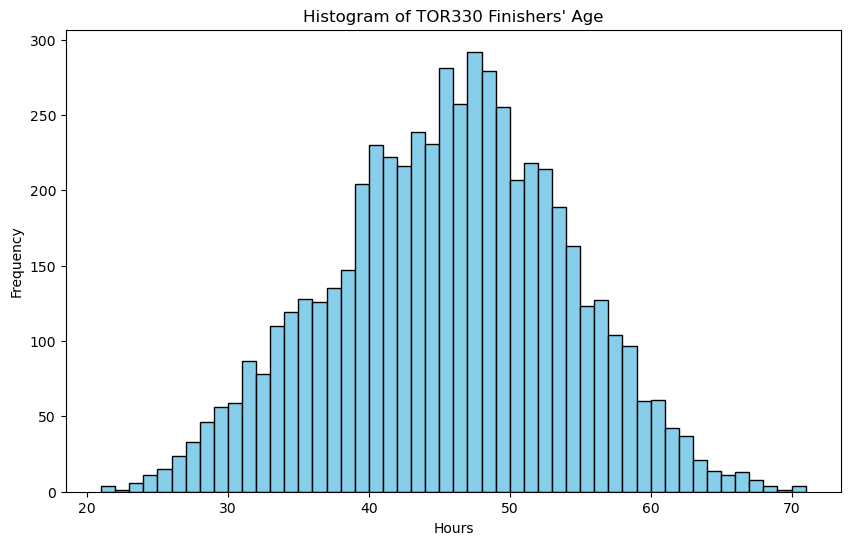

In [31]:
# Replace '-' with None, then convert to numeric
TOR330_itra_finishers_df['Age'] = TOR330_itra_finishers_df['Age'].str.replace('-', '', regex=False)
TOR330_itra_finishers_df['Age'] = pd.to_numeric(TOR330_itra_finishers_df['Age'], errors='coerce')


max_Age = TOR330_itra_finishers_df['Age'].max()
min_Age =  TOR330_itra_finishers_df['Age'].min()
age_bins = int(max_Age - min_Age)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(TOR330_itra_finishers_df['Age'], bins=age_bins, color='skyblue', edgecolor='black')
plt.title('Histogram of TOR330 Finishers\' Age')
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.show()

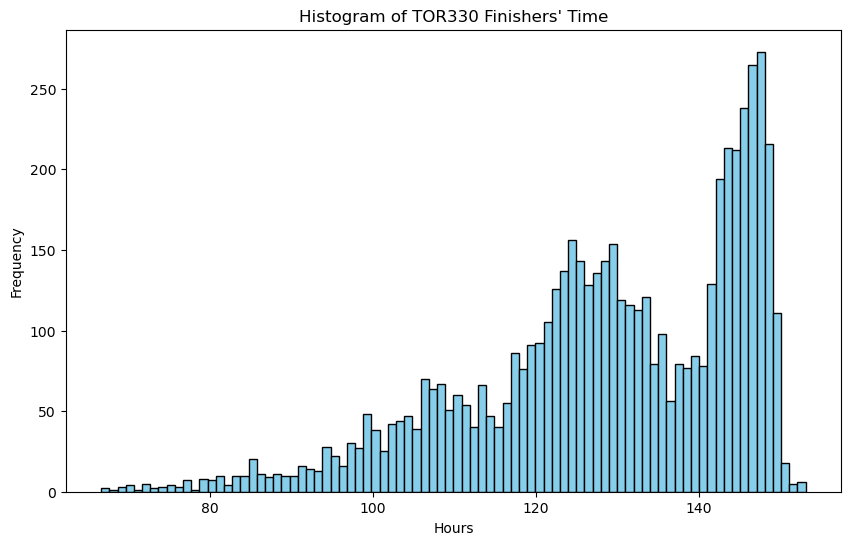

In [32]:
TOR330_itra_finishers_Performance = [t.total_seconds() / 3600 for t in TOR330_itra_finishers_df['Performance']]

max_Performance = max(TOR330_itra_finishers_Performance)
min_Performance =  min(TOR330_itra_finishers_Performance)
Performance_bins = int(max_Performance- min_Performance)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(TOR330_itra_finishers_Performance, bins=Performance_bins, color='skyblue', edgecolor='black')
plt.title('Histogram of TOR330 Finishers\' Time')
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.show()

In [33]:
 TOR330_itra_finishers_df['Age'].describe()

count    5609.000000
mean       45.150116
std         8.336255
min        21.000000
25%        40.000000
50%        45.000000
75%        51.000000
max        71.000000
Name: Age, dtype: float64

In [34]:
 TOR330_itra_finishers_df['Performance'].describe()

count                         5692
mean     5 days 08:44:33.346978215
std      0 days 16:39:50.689020266
min                2 days 18:39:16
25%                4 days 23:19:00
50%         5 days 10:26:31.500000
75%         5 days 23:40:46.750000
max                6 days 09:05:28
Name: Performance, dtype: object